<a href="https://colab.research.google.com/github/Arminhosseini/Justice_in_work/blob/main/JusticeInWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
dataset = df.dropna()

pre processing data because input of the sklearn should be numerical

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset['ProId'] = le.fit_transform(dataset['ProId'])
dataset['CustId'] = le.fit_transform(dataset['CustId'])
dataset['ServiceId'] = le.fit_transform(dataset['ServiceId'])
dataset['CategoryId'] = le.fit_transform(dataset['CategoryId'])
dataset['ZoneId'] = le.fit_transform(dataset['ZoneId'])
dataset['TargetProId'] = le.fit_transform(dataset['TargetProId'])
dataset['isFraud'] = le.fit_transform(dataset['isFraud'])
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,id,ProId,ProCreationTimestamp,CustId,CustCreationTimestamp,Rate,TaskCreationTimestamp,Price,ServiceId,CategoryId,ZoneId,TaskState,TargetProId,isFraud
0,VkSa32MyS738HMkfk4tEfk,906,1552751751302,808,1565441404199,5,1565608270089,362000.0,93,4,5,Finished,797,0
27,jwKAXYt573wTYDu6yxihkU,601,1556904075820,752,1554788006915,4,1564973149337,210000.0,87,4,2,Finished,689,0
32,vnekcXYoHBQofahh3tFF3r,23,1566807500433,542,1572344801667,4,1572612028808,60000.0,63,4,10,Finished,103,0
45,SvxzMWu2AoA6JpSLvCdNWq,408,1548758653791,1340,1559733326348,1,1559828125093,60000.0,63,4,23,Finished,11,0
47,GWN8dbCayhekT4wLto6bL3,392,1536589150655,139,1540992260124,5,1541105847195,40000.0,76,4,23,Finished,327,0


split dataset into two parts, data and target. and deleting unnecessary features 

In [ ]:
cols = [col for col in dataset.columns if col not in ['isFraud','id','TaskState']]
data = dataset[cols]
target = dataset['isFraud']
data.head

<bound method NDFrame.head of        ProId  ProCreationTimestamp  CustId  ...  CategoryId  ZoneId  TargetProId
0        906         1552751751302     808  ...           4       5          797
27       601         1556904075820     752  ...           4       2          689
32        23         1566807500433     542  ...           4      10          103
45       408         1548758653791    1340  ...           4      23           11
47       392         1536589150655     139  ...           4      23          327
...      ...                   ...     ...  ...         ...     ...          ...
24820     52         1534895234499     295  ...           2      23           37
24830    118         1539102913177     717  ...           4      23          299
24831    214         1559380918465     397  ...           4       0          520
24850    807         1545460832847    1436  ...           4      23          473
24853    897         1513248833327    1031  ...           4      23          61

Adding some new features by division yes or no features into new ones

In [ ]:
cat_vars=['Rate','CategoryId','ZoneId']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['Rate','CategoryId','ZoneId']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

array(['ProId', 'ProCreationTimestamp', 'CustId', 'CustCreationTimestamp',
       'TaskCreationTimestamp', 'Price', 'ServiceId', 'TargetProId',
       'Rate_1', 'Rate_2', 'Rate_3', 'Rate_4', 'Rate_5', 'CategoryId_0',
       'CategoryId_1', 'CategoryId_2', 'CategoryId_3', 'CategoryId_4',
       'CategoryId_5', 'CategoryId_6', 'CategoryId_7', 'ZoneId_0',
       'ZoneId_1', 'ZoneId_2', 'ZoneId_3', 'ZoneId_4', 'ZoneId_5',
       'ZoneId_6', 'ZoneId_7', 'ZoneId_8', 'ZoneId_9', 'ZoneId_10',
       'ZoneId_11', 'ZoneId_12', 'ZoneId_13', 'ZoneId_14', 'ZoneId_15',
       'ZoneId_16', 'ZoneId_17', 'ZoneId_18', 'ZoneId_19', 'ZoneId_20',
       'ZoneId_21', 'ZoneId_22', 'ZoneId_23', 'ZoneId_24', 'ZoneId_25',
       'ZoneId_26', 'ZoneId_27', 'ZoneId_28', 'ZoneId_29', 'ZoneId_30',
       'ZoneId_31', 'ZoneId_32', 'ZoneId_33', 'ZoneId_34'], dtype=object)

Oversampling data beacuse of imbalance between true and false cases

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_final, target, test_size = 0.3, random_state = 0)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Learning data with randomforest algorithm that selected based on guidance of this link
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rfc = RandomForestClassifier()
rfc.fit(X_train_res, y_train_res)
rfc_predict = rfc.predict(X_test)

Validating our model by this chart 

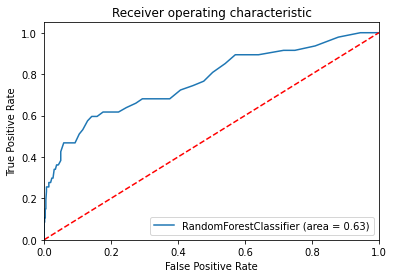

In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

our learning model metrics

In [ ]:
print(confusion_matrix(y_test, rfc_predict))
print(classification_report(y_test, rfc_predict))

[[554   8]
 [ 34  13]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       562
           1       0.62      0.28      0.38        47

    accuracy                           0.93       609
   macro avg       0.78      0.63      0.67       609
weighted avg       0.92      0.93      0.92       609

